In [ ]:
from datasets import BananaDataset
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="unconstrained_amortized_optimal_transport_quantile_regression",
    pushforward_operator_parameters=dict(
        alpha=0.01,
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=8,
        number_of_hidden_layers=4,
        activation_function_name="Softplus",
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=1000,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)
dataset = BananaDataset(**experiment.dataset_parameters, tensor_parameters=experiment.tensor_parameters)

model = train(experiment)
_ = model.eval()

Epoch: 236, Potential Objective: 3.050, Amortization Objective: 24.754, LR: 0.008693:  24%|██▎       | 235/1000 [00:16<01:00, 12.74it/s]

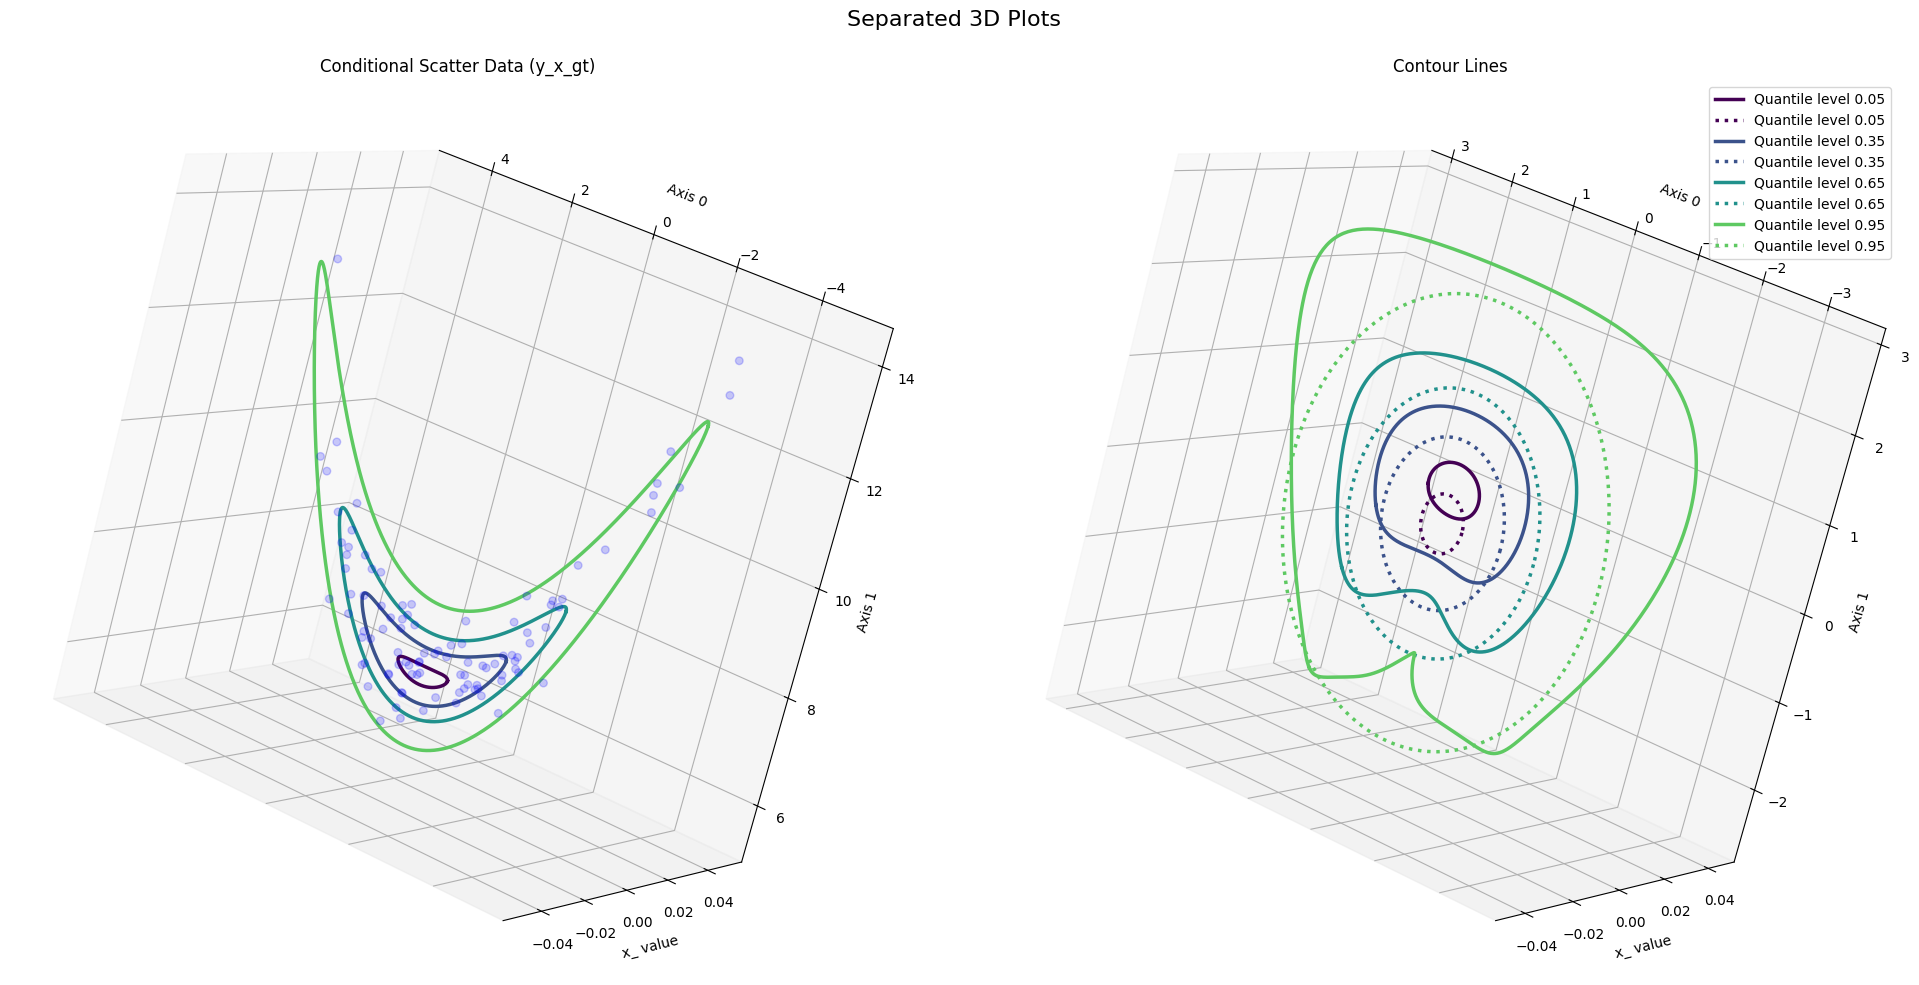

In [4]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_dataset
from datasets import BananaDataset

dataset = BananaDataset(**experiment.dataset_parameters, tensor_parameters=experiment.tensor_parameters)

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[1.9]]),
    number_of_quantile_levels=4,
    tensor_parameters=experiment.tensor_parameters
)